In [1]:
from PIL import Image
import numpy as np
from dataset.utils import elpv_reader

import keras
from keras import backend as K
from keras.models import *
from keras.layers import *
from keras.layers.core import *
from keras.optimizers import *
from keras.layers.convolutional import *
from keras.metrics import *

from matplotlib.pyplot import *

C:\Users\User-PC-10\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
trainImages = None
trainProb = None
validationImages = None
validationProb = None
testImages = None
testProb = None
images = None

model = None

numSamples = 2624


In [3]:
# Make a model
K.clear_session()
global model
model = None
model = Sequential()


resNet_model = keras.applications.inception_resnet_v2.InceptionResNetV2()
input_shape = (224,224,3,)
num_classes = 1
#for layer in denseNet_model.layers:
    #model.add(layer)
    

#denseNet_model = None

#for layer in model.layers:
    #layer.trainable = False

#model.add(Dense(1, activation='sigmoid'))

model.summary()
resNet_model.summary()

225214464/225209952 [==============================] - 92s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0] 

batch_normalization_133 (BatchN (None, None, None, 1 576         conv2d_133[0][0]                 
__________________________________________________________________________________________________
batch_normalization_136 (BatchN (None, None, None, 1 576         conv2d_136[0][0]                 
__________________________________________________________________________________________________
activation_133 (Activation)     (None, None, None, 1 0           batch_normalization_133[0][0]    
__________________________________________________________________________________________________
activation_136 (Activation)     (None, None, None, 1 0           batch_normalization_136[0][0]    
__________________________________________________________________________________________________
block17_15_mixed (Concatenate)  (None, None, None, 3 0           activation_133[0][0]             
                                                                 activation_136[0][0]             
__________

block8_6 (Lambda)               (None, None, None, 2 0           block8_5_ac[0][0]                
                                                                 block8_6_conv[0][0]              
__________________________________________________________________________________________________
block8_6_ac (Activation)        (None, None, None, 2 0           block8_6[0][0]                   
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, None, None, 1 399360      block8_6_ac[0][0]                
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, None, None, 1 576         conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, None, None, 1 0           batch_normalization_189[0][0]    
__________

In [86]:
# Load Dataset
global trainImages, trainProb, validationImages, validationProb, testImages, testProb, images
images, proba, types = elpv_reader.load_dataset()
#images = images.astype("float32")
#images = np.asarray(images)/255

trainImages =  np.array(images[0:2224])
#trainImages =  np.array(images[0:2224])

#trainImages = np.reshape(trainImages, (trainImages.shape+(1,)))

trainProb = np.array (proba[0:2224])
#trainProb = np.array (proba[0:2224])

#validationImages = np.array(images[1800:2224])
#validationImages = np.reshape(validationImages, (validationImages.shape+(1,)))
#validationProb = np.array(proba[1800:2224])

testImages = np.array(images[2224:])
#testImages = np.reshape(testImages, (testImages.shape+(1,)))
testProb = np.array(proba[2224:])
    


In [7]:
opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['accuracy'])

In [87]:
model.fit (trainImages,trainProb, validation_split=0.02, batch_size=16,epochs=5, shuffle=False, verbose=1)
model.save ('myModel.h5')
print ("Model saved")

Train on 2179 samples, validate on 45 samples
Epoch 1/5
2179/2179 [==============================] - 139s 64ms/step - loss: 0.0940 - acc: 0.7508 - val_loss: 0.6784 - val_acc: 0.2222
Epoch 2/5
2179/2179 [==============================] - 136s 62ms/step - loss: 0.0950 - acc: 0.7444 - val_loss: 0.6785 - val_acc: 0.2222
Epoch 3/5
2179/2179 [==============================] - 136s 62ms/step - loss: 0.0926 - acc: 0.7490 - val_loss: 0.6796 - val_acc: 0.2222
Epoch 4/5
2179/2179 [==============================] - 137s 63ms/step - loss: 0.0913 - acc: 0.7522 - val_loss: 0.6812 - val_acc: 0.2222
Epoch 5/5
2179/2179 [==============================] - 136s 63ms/step - loss: 0.0905 - acc: 0.7522 - val_loss: 0.6826 - val_acc: 0.2222
Model saved


In [84]:
model.evaluate(testImages[380:400], testProb[380:400], verbose=1)

20/20 [==============================] - 2s 83ms/step


[0.09904066473245621, 0.550000011920929]

In [71]:
out =  model.predict (testImages[0:1])

In [72]:
out = np.array(out)
out = out.astype (np.float32)
testProb = np.array(testProb)
testProb = testProb.astype(np.float32)
print ('Real', testProb[0:1])
print ('Predicted' ,out)


Real [0.]
Predicted [[0.19877608]]


# Confusion Matrix


In [ ]:
# %matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation=45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
		print ("Normalized confusion matrix")
	else:
		print ("Confusion matrix, without normalization")
	print (cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
	
	plt.tight_layout()
	plt.ylabel('True label')
	plt.xlabel('Predicted label')


## Plotting Function

In [ ]:
def plots (ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0] is np.array):
        ims= np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 == 0 else len (ims) // rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

# Load and Save Model


This will load and save a model

## Save a model


In [10]:
model.save ('myModel.h5')

This function saves architecture of the model, weights of the model, training configuration (loss, optimizer) and state of optimizer

## Load a model

In [4]:
from keras.models import load_model
model = load_model ('myModel.h5')

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Junk Stuff

(400, 224, 224, 3)
[0.         0.33333333 1.         1.         1.         1.
 0.33333333 1.         1.         1.         1.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


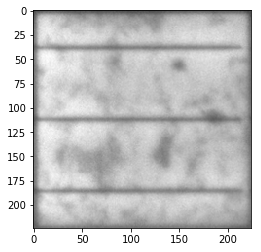

In [46]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

x=55
print (testImages.shape)

tatras = Image.fromarray(testImages[x])
#tatras.show()
%matplotlib inline
#x=207

#tatras = Image.fromarray(images[x])
imshow(tatras)
#print(trainProb[x])

#model = None
print(testProb[100:120])


#print (trainProb[200:220])


In [7]:
type(denseNet_model)

keras.engine.training.Model